<a href="https://colab.research.google.com/github/lawbaker/PythonOR2021/blob/main/OR_Convex_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operations Research 2021 TA Session 2.2 & 3: Convex Optimisation in Python

## Lawrence Baker

## Sessions
1.   An introduction to python (and colab)
2.   Linear algebra & **unconstrained convex optimization problems**
3.   **Constraints and integer programming**
4.   *TBD - Networks? Dataframes? What do you want?*
5.   An introduction to machine learning

# Introduction

In this session I'm going to cover how to do convex optimisation in python. 

I didn't use python for this last year, so I'm new to this package too, but it's fairly intuative (and similar to AMPL)

We're going to use a package called [CVXPY](https://www.cvxpy.org/)

## Import Packages

In [ ]:
##Import packages
import cvxpy as cp
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Session 2.2: Unconstrained Convex Optimisation

We can write our optimisation problems in the form:

$ min_x f(x)$

subject to: $g_i(x) \leq 0, i = 1, ..., m$

subject to: $h_i(x) = 0, i = 1, ..., n$

## Unconstrained optimisation

In the simplest form of this problem, there are no constraints: $m = n = 0$

Now we're left with

$ min_x f(x)$

### Unconstrained Example: OLS

Let's do a simple example, OLS:

$$min_x ||Ax - b||^2_2$$

Note that, for some reason, in linear algebra they have very different notation to economists. Here $A$ is our matrix of observables, x are the coefficients we are choosing (normally $\beta$ in econ), and $b$ is our target.

We can write this as a sum of the square of each residual (a vector $a_i$, multiplied by a vector of $x_i$, minus the target $b$). 

$a_i^T x$ is our prediction for $i$ and $b_i$ is the true value.

$$min_x \sum_{i=1}^n (a_i^T x - b_i)^2 $$



Let's solve this in cvxpy (this code is based off [the CVXPY example here](https://www.cvxpy.org/examples/basic/least_squares.html), the documentation is great and some of it has examples are in colab)

#### Import data

I am using a common machine learning dataset on iris flowers. Each row is a set of flower measurements. We will use the first three measurements to predict the fourth.


In [ ]:
## Generate some data
iris = datasets.load_iris()

#First 3 columns are for A
A = iris['data'][:,0:3]

#Final column is for B
b = iris['data'][:,3]

In [ ]:
b

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

#### Solve

We will use columns 1 to 3 to predict column 4 (outcome)

In [ ]:
#Define our variable that we are changing to minimize
# It's 3 big because that's how many X there are (coefficients on A)
x = cp.Variable(3)

# Define the mean squared error (the function we want minimized)
MSE = cp.sum_squares(A @ x - b)
# Define the problem as a minimization
prob = cp.Problem(cp.Minimize(MSE))
#Tell it to solve
prob.solve()

print("The minimum MSE is", prob.value)
print("\nThe X values are", x.value)

The minimum MSE is 5.447185223868676

The X values are [-0.24560513  0.20405077  0.53552165]


### Unconstrained Example: COVID in New York

#### Import Data

In [ ]:
#Lets get the New York data
covid = pd.read_csv('https://api.covidtracking.com/v1/states/ny/daily.csv')
covid.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,NY,1681169,NaN,NaN,NaN,totalTestEncountersViral,39695100,4789.0,89995.0,999.0,NaN,682.0,NaN,NaN,3/6/2021 14:00,2021-03-06T14:00:00Z,03/06 09:00,39029.0,89995.0,150100.0,2021-03-06T14:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,39695100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,6789,0,1681169,227768,1681169,NaN,59,0,72f520a3538592c24dde022170ae82841d4d2ef9,0,0,0,0,0,NaN
1,20210306,NY,1674380,NaN,NaN,NaN,totalTestEncountersViral,39467332,4954.0,89995.0,1012.0,NaN,694.0,NaN,NaN,3/5/2021 14:00,2021-03-05T14:00:00Z,03/05 09:00,38970.0,89995.0,149481.0,2021-03-05T14:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,39467332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,7647,0,1674380,273132,1674380,NaN,79,0,cb77d2163ba007105af830c9bb4de5a0bfd96859,0,0,0,0,0,NaN
2,20210305,NY,1666733,NaN,NaN,NaN,totalTestEncountersViral,39194200,5034.0,89995.0,1030.0,NaN,700.0,NaN,NaN,3/4/2021 14:00,2021-03-04T14:00:00Z,03/04 09:00,38891.0,89995.0,148923.0,2021-03-04T14:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,39194200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,8956,0,1666733,296935,1666733,NaN,95,0,3b2002d4b127ba2cd97aa9696daec74f3c1c5315,0,0,0,0,0,NaN
3,20210304,NY,1657777,NaN,NaN,NaN,totalTestEncountersViral,38897265,5177.0,89995.0,1043.0,NaN,712.0,NaN,NaN,3/3/2021 14:00,2021-03-03T14:00:00Z,03/03 09:00,38796.0,89995.0,148355.0,2021-03-03T14:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,38897265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,7593,0,1657777,270089,1657777,NaN,61,0,fd521527694c269fc2d5acae5f6aedff4c317f28,0,0,0,0,0,NaN
4,20210303,NY,1650184,NaN,NaN,NaN,totalTestEncountersViral,38627176,5323.0,89995.0,1047.0,NaN,735.0,NaN,NaN,3/2/2021 14:00,2021-03-02T14:00:00Z,03/02 09:00,38735.0,89995.0,147730.0,2021-03-02T14:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,38627176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,7704,0,1650184,218069,1650184,NaN,75,0,9e1d88ac35d74dc7969fd77d287ae42d5721f5f8,0,0,0,0,0,NaN


#### Clean data

In [ ]:
#Keep only the columns we need
covid = covid[['date', 'positive']]
#Conver the date to an actual date
covid['date'] = pd.to_datetime(covid['date'], format="%Y%m%d")
#Keep only the dates in March 2020
covid = covid[(covid['date'] < '2020-03-23') & (covid['date'] > '2020-03-05')]
#Set up a day column
covid['day'] = (covid['date'] - min(covid['date'])).dt.days + 1
covid.head()

,date,positive,day
350,2020-03-22,15168,17
351,2020-03-21,10356,16
352,2020-03-20,7102,15
353,2020-03-19,4152,14
354,2020-03-18,2383,13


#### Plot data

Let's do a quick plot, this is often the first step to solving a real-world problem.

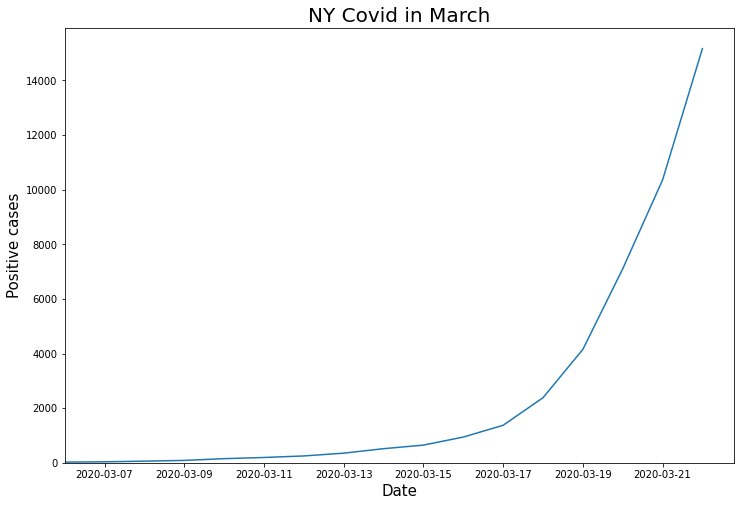

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.lineplot(data = covid,  x='date', y='positive')

plt.title("NY Covid in March", fontsize=20)
plt.ylabel("Positive cases", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylim(bottom = 0)
plt.xlim(left = 737490)

plt.show()

#### Define a convex problem

Looks pretty exponential, what would the best exponent be? Let's say the data is of the form

$$ cases = \alpha e^{\gamma day}$$
$$ c = \alpha e^{\gamma d}$$

If we take logs (so this is a convex problem)

$$ ln(c) = ln(\alpha) +\gamma d$$

We can write this as a constained optimisation problem where we minize the mean squared error

$$min_x \sum_{i=1}^n (ln(\alpha) +  \gamma d - ln(c))^2 $$

Now we can plot what out transformed problem looks like

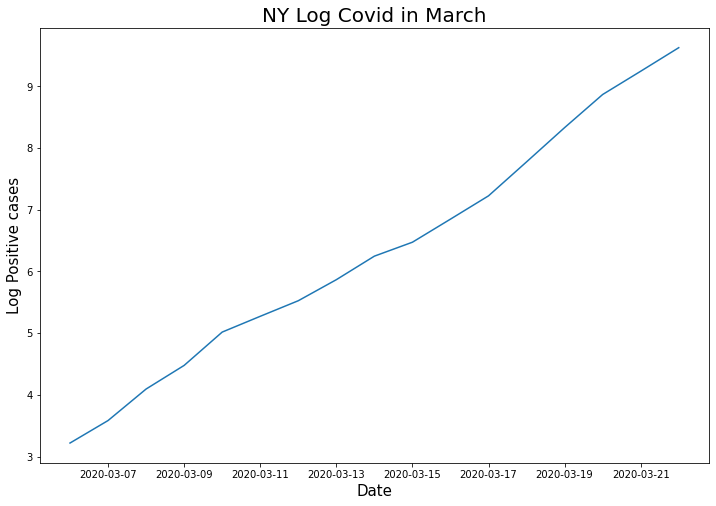

In [ ]:
covid['log_positive'] = np.log(covid['positive'])

fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.lineplot(data = covid,  x='date', y='log_positive')

plt.title("NY Log Covid in March", fontsize=20)
plt.ylabel("Log Positive cases", fontsize=15)
plt.xlabel("Date", fontsize=15)


plt.show()

Let's solve this with CVXPY:

In [ ]:
#Put our data into arrays
c = np.array(covid['positive'])
d = np.array(covid['day'])

#Define our variable that we are changing to minimize
ln_alpha = cp.Variable(1)
gamma = cp.Variable(1)

# Define the mean squared error (the function we want minimized)
MSE = cp.sum_squares(ln_alpha + gamma * d - np.log(c))
# Define the problem as a minimization
prob = cp.Problem(cp.Minimize(MSE))
#Tell it to solve
prob.solve(solver=cp.SCS, eps=1e-12)

print("\nThe minimum MSE is", prob.value)
print("\nThe optimal alpha value is", ln_alpha.value)
print("\nThe optimal gamma value is", gamma.value)


The minimum MSE is 0.4319036102616166

The optimal alpha value is [2.82890235]

The optimal gamma value is [0.38959617]


Now let's plot the result, looks pretty good!

We care about this exponent because it tell us about the $R_0$ of the virus (although there are many problems with this data, mainly that testing levels are changing at the same time, so this is probably an overestimate.

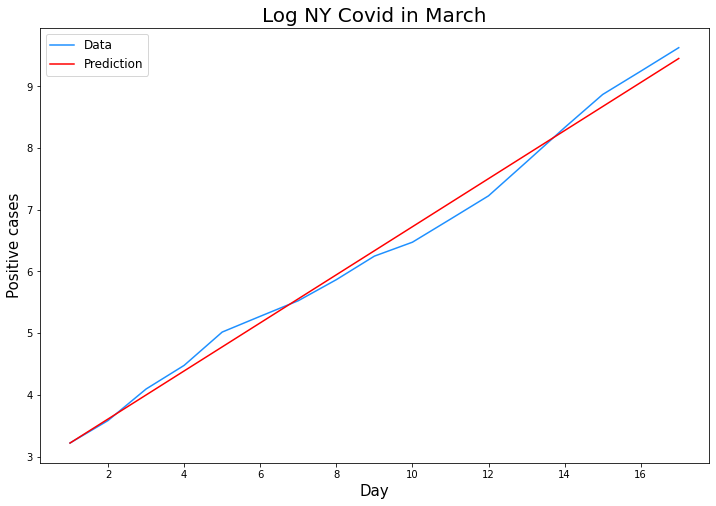

In [ ]:
log_pred = ln_alpha.value + (gamma.value) * d

fig, ax = plt.subplots(1, 1, figsize = (12, 8))

plt.plot(d, np.log(c), label = "Data", color = 'dodgerblue')
plt.plot(d, log_pred, label = "Prediction", color = 'red')
plt.legend(fontsize = 12)
plt.title("Log NY Covid in March", fontsize=20)
plt.ylabel("Positive cases", fontsize=15)
plt.xlabel("Day", fontsize=15)

plt.show()

However, once we retransform into the space we care about by exponentiating, we see our prediction isn't as good. This is because the errors for higher numbers become stretched, and the errors for smaller numbers squished.

So, we wouldn't choose this method in the real world, but I wanted to give you a demonstration of using these methods on real data.

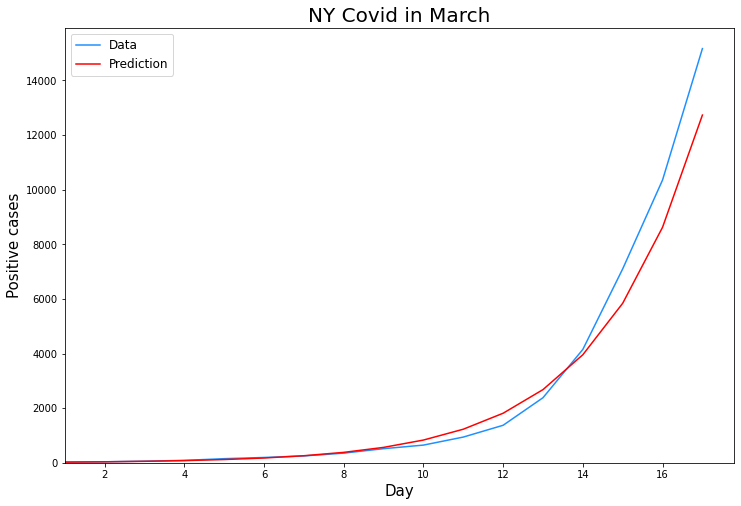

In [ ]:
x = np.arange(1, covid.shape[0]+1)
pred = np.exp(ln_alpha.value + (gamma.value) * x)

fig, ax = plt.subplots(1, 1, figsize = (12, 8))

plt.plot(d, c, label = "Data", color = 'dodgerblue')
plt.plot(x, pred, label = "Prediction", color = 'red')
plt.legend(fontsize = 12)
plt.title("NY Covid in March", fontsize=20)
plt.ylabel("Positive cases", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.ylim(bottom = 0)
plt.xlim(left = 1)

plt.show()

# Session 3: Constrained Covex Optimization and Integer Programming

This session we're going to cover constrained optimization (adding constraints), integer programming (where the answer is discrete), and some of the complexities that I glossed over last time.

## DCP and Atoms

As implied by the name, CVXPY can only handle convex problems (with a few notable exceptions like linear programming). So, ***how does it know when a problem is convex?***

### Disciplined Convex Programming

Disciplined Convex Programming ([DCP](https://dcp.stanford.edu/home)) is a system for constructing mathematical expressions with known curvature. 

Essentially it has a list of functions and their curvature (with details about their signs too). It also has a set of rules for how functions can be manipulated while preserving curvature. For instance, a convex function of convex functions is convex. So the sum of two convex expressions is convex. [More detail on these rules here](https://www.cvxpy.org/tutorial/dcp/).

The DCP rules are applied to make sure you are asking CVXPY to do one of two things:

* $Minimize  (convex) $
* $Maximize (concave) $

If you try and do anything else then CVXPY will fall over and give you an error

```
Error: Problem does not follow DCP rules.
```



### Atoms

In the lectures Brien has given you a list of functions and transformations you know are convex. You should treasure this list and keep it handy for finals and quals.

CVXPY keeps a similar list, [the list of Atomic Functions](https://www.cvxpy.org/tutorial/functions/).

Whenever we define an objective function or constraints for CVXPY, we need to make sure that we only use these functions. Further, they need to be CVXPY's version of these functions. So to take a log of the variable $x$ you should use:

```
cp.log(x)
```

If you try to use 

```
np.log(x)
```
Then CVXPY will get upset.

Normally (as with the examples above), we can happily construct our problems using the basic functions that mirror what we would use for 'normal' mathematical operations. Things like:

```
x + cp.log(x) + cp.exp(x) + cp.sqrt(x)
```

Sometimes there might be a different way of writing a common function. To do $x^2$ then you must use one of:

```
cp.power(x,2)
cp.square(x)
```

In a few cases, you will do something completely legitmate and CVXPY will still throw an error:


In [ ]:
# Create variable
x_1 = cp.Variable(1)

obj = x_1 * cp.log(x_1) + 2*x_1 + 2

prob = cp.Problem(cp.Minimize(obj))

prob.solve()

DCPError: ignored

Fortunately, the error messages are quite informative, we see:

```
The objective is not DCP. Its following subexpressions are not:
var5 * log(var5)
```

So we know the problem is with them term $x_1 log x_1$. But this is on Brien's convex list!

CVXPY cannot tell that this is convex, because it has a rule that essentially says:

> Two non-constant expressions multiplied (or divided) might not be convex.

To be safe, it assumes that no function like this is convex. However, if we look at the list then we see that there is a prespecified function (called entropy)

$$ entr(x) = -xlog(x)$$

If we use this prespecified function in our specification, CVXPY then knows this is a convex problem. The rule is always to use pre-specified functions, unless you are adding/subtracting or multipliying by a constant.

Let's try this:


In [ ]:
# Create variable
x_1 = cp.Variable(1)

# Note the minus sign
obj = -cp.entr(x_1) + 2*x_1 + 2

prob = cp.Problem(cp.Minimize(obj))

prob.solve()
prob.value

1.9502129231026384

In [ ]:
print(x_1.value)

[0.04978706]


Success!

### Curvature

You can ask CVXPY to check the curvature of a function if you want to check the individual parts.

I remember the curves this way:

* Convex - bowl (or half a bowl)
* Concave - hat (or half a hat)
* Affine - straight line

In [ ]:
x_plot = np.arange(-10, 10, 0.01)
x_plot_pos = x_plot[x_plot>0]

In [ ]:
x_1 = cp.Variable(1)

x_1.curvature

'AFFINE'

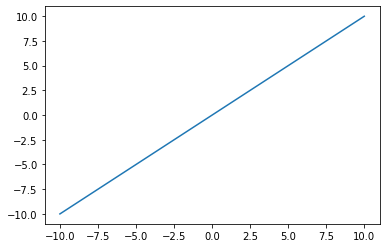

In [ ]:
plt.plot(x_plot, x_plot)
plt.show()

In [ ]:
(0.3*x_1).curvature

'AFFINE'

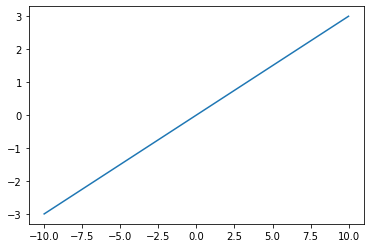

In [ ]:
plt.plot(x_plot, 0.3*x_plot)
plt.show()

In [ ]:
cp.log(x_1).curvature

'CONCAVE'

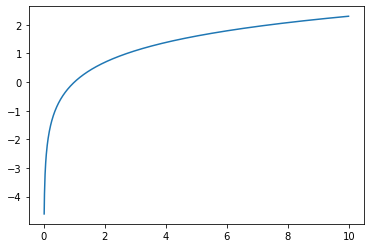

In [ ]:
plt.plot(x_plot_pos, np.log(x_plot_pos))
plt.show()

In [ ]:
(x_1 * cp.log(x_1)).curvature

'UNKNOWN'

In [ ]:
(-cp.entr(x_1)).curvature

'CONVEX'

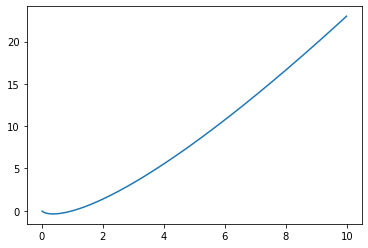

In [ ]:
plt.plot(x_plot_pos, x_plot_pos*np.log(x_plot_pos))
plt.show()

## Array Variables

### Declaring Array Variables

Sometimes we want to declare whole arrays (you'll do this in homework 3) rather than just single variables or vectors of variables. The syntax to this is:

In [ ]:
x = cp.Variable((3, 7))

This makes a matrix variable with 3 rows and 7 columns.

The keen-eyed will have noticed that the function call here (and in some other places where we have initalized ranges) looks strange, why:

```
(3, 7)
```

and not

```
[3, 7]
```

inside the brackets?

In the same way that [...] is a list and {...} is a dictionary, (...) gives a tuple (pronounced tupple). They sort of function like lists, but once you declare them you cannot change the elements. Something to be aware of, but not to worry about.



### Elementwise Multiplying array (and vector) variables

For the DCP reasons explained above, CVXPY is very wary when it comes to multiplication.

For less defensible reasons, when you use '*' with array variables, CVXPY will assume you mean matrix multiplication, and not element-wise multiplication. This is the opposite behavior to base python.

Instead, if we look at the list of atomic functions we see that there is a function for multipliying. So elementwise multiplying a constant array and an array variable looks like this:

In [ ]:
a = np.array([[4,  10, 9,  6,  18],
              [8,  2,  12, 8,  10],
              [11, 8,  10, 7,  9 ],
              [19, 6,  10, 6,  4 ],
              [-8, 9,  11, 8,  2]])

x = cp.Variable((5, 5))

cp.multiply(x, a)

Expression(AFFINE, UNKNOWN, (5, 5))

## Simple Constraints

Sometimes we want to add constraints to our problem. For most constaints this is very easy in CVXPY.

For ease of extracting dual variables, I would suggest you always define constraints as a list outside the function call:

In [ ]:
# Create variables
x_1 = cp.Variable(1)
x_2 = cp.Variable(1)

#Define an intermediate function
q_1 = 3*x_1 + 4*x_2

#Define constaints
constraints = [0.7 - x_1 <= 0, 
               x_2 - 3<= 0, 
               q_1 - 4 <= 0]

# Note the minus sign
obj = -x_1 + cp.square(x_1) - x_2 + cp.power(x_2, 3)

# Here we call the constraints
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve()

print("\nThe optimal objective function is", prob.value)
print("\nThe optimal x_1 is", x_1.value)
print("\nThe optimal x_2 is", x_2.value)


The optimal objective function is -0.5778281253496275

The optimal x_1 is [0.7]

The optimal x_2 is [0.475]


### Dual Variables

We can also extract the corresponding dual variables, by calling the attribute 'dual_value' of the elements of the constraint list.

In [ ]:
print("The local value of slackening constraint 'x_1 >= 0.7' is:", constraints[0].dual_value[0])
print("\nThe local value of slackening constraint 'x_2 <= 3' is:", constraints[1].dual_value[0])
print("\nThe local value of slackening constraint 'q_1 <= 4' is:", constraints[2].dual_value[0])


The local value of slackening constraint 'x_1 >= 0.7' is: 0.6423515058367689

The local value of slackening constraint 'x_2 <= 3' is: 7.029134326934331e-11

The local value of slackening constraint 'q_1 <= 4' is: 0.08078314324763167


If ever you see a very small value (like $1*10^{-11}$) then this is likely due to machine error and you can think of this constraint as non-binding.

## Constrained Optimization Example

The total cost of making Hasbro's revolutionary new toy 'sphere attached via string to receptacle&trade;' is:

$C(x) = x^2 - 3x + 4$

Consumers, clamouring for ever more of this simple yet addicting game, are willing to pay the price:

$P(x) = 190 - 50log(x) - 0.1x$

Where $x$ is the number of toys produced in millions.

There's a minimum production run of 3 million, and all toys produced must be sold.

It looks bad to gouge desparate parents, so the price cannot exceed 80.

**How many toys should Hasbro produce to maximize profits? What price do they sell for? How much profit do they make?**

(This is not the best example because in reality they could fix the price at 80 and sell more - this is the issue with me making up problems quickly. Suspend disbelief and assume that price is only a function of the amount produced).


### Writing down the convex problem

Profits

$$\pi = P(x)x - C(x)$$

Substituting in:
$$\pi = (190-50log(x)-0.1x)x - x^2 +3x - 4$$

Multiplying out:
$$\pi = 190x-50xlog(x)-0.1x^2 - x^2 +3x - 4$$

Collecting terms:
$$\pi = 187x-50xlog(x)- 1.1x^2 - 4$$

In terms of atomic functions:
$$\pi = 187x + 50entr(x)- 1.1square(x) - 4$$

We want to phrase our problems in terms of minimization, so introduce a minus sign:

$$-\pi = -187x - 50entr(x) + 1.1square(x) + 4$$

Now we can fully describe the problem in the standard form:

$$min_x ( -187x - 50entr(x) + 1.1square(x) + 4)$$

subject to:

$$P(x) - 80 \leq 0$$

$$3-x \leq 0$$

### Solving convex problem

In [ ]:
# Create varaibles
x = cp.Variable(1)

# Define price
p = 200 - 50*cp.log(x) - 0.1*x

# Define (negative) profit as the objective function
neg_profit = (-187*x - 50*cp.entr(x) + 0.5*cp.square(x) + 4)

# Define constraints
constraints = [p - 80 <= 0,
               3-x <= 0]

#Define problem as minimizing negative profit, s.t. constraints
prob = cp.Problem(cp.Minimize(neg_profit), constraints)

#Solve problem
prob.solve()

#Print primal variables
print("\nThe optimal profit (in millions) is $", round(-prob.value, 3))
print("\nThe optimal production (in millions) is", round(x.value[0],3))
print("\nThe optimal price is $", round(p.value[0],3))

#Print dual variables
print("\n\nThe local value of slackening price constraint is:", constraints[0].dual_value)
print("\nThe local value of slackening production constraint is:", constraints[1].dual_value)



The optimal profit (in millions) is $ 677.111

The optimal production (in millions) is [12.147]

The optimal price is $ 73.932


The local value of slackening price constraint is: [3.1285423e-07]

The local value of slackening production constraint is: [9.04901886e-08]


So the **optimal production is 12.1 million units**.

Each sells at **a price of $73.93**.

This generates a **profit of $677 million**.

## Integer Programming

Integer programming is when we restrict our variables to be integers. In this course, this will just be a restriction to 1 (on) or 0 (off). We can write:

$$ x \in \{0, 1\} $$

In our problem forumlation we write this as a constraint, but in CVXPY (as in AMPL) we declare this when we assign the variable.

In [ ]:
x = cp.Variable(4, boolean = True)

Easy!

## Trickier Constraints

[A useful contraints reference](http://yetanothermathprogrammingconsultant.blogspot.com/2019/11/cvxpy-matrix-style-modeling-limits.html). In particular, their example problems 1 and 4 have some similarities in constraints to your problem on Homework 3.

CVXPY can only handle constraints in matrix algebra. This is usually not a problem, especially when our variables are singular (i.e. not a matrix or a vector). This is the one area where I think AMPL is signficiantly easier than CVXPY (AMPL will let you include for loops in constaints).

### Tricky constraint 1

Let's imagine we have an $5$ by $3$ matrix $x$ and a length $3$ vector $a$, both of which might be choice variables in our convex model.

$$x= \begin{pmatrix}
  x_{11}  & x_{12} & x_{13}\\
  x_{21}  & x_{22} & x_{23}\\
  x_{31}  & x_{32} & x_{33}\\
  x_{41}  & x_{42} & x_{43}\\
  x_{51}  & x_{52} & x_{53}\\
 \end{pmatrix}$$

and

 $$a= \begin{pmatrix}
  a_{1} \\
  a_{2} \\
  a_{3} \\
 \end{pmatrix}$$

 We might want to write a constraint like this:

$$ \sum_i x_{i,j} \leq a_j$$

Which we can also write:

$$ \sum_i x_{i,j} - a_j \leq 0$$

So this says that each column of $x$ must sum to less than the value of the corresponding entry in $a$.

This is relatively easy to write in summations, but these won't work for every problem. A more general technique is to write this with matrix algebra, which is a little tricky. What we want to produce is a vector that contains the correct elements of $x$ in the same dimensions as $a$. Let's call this $p$. In this case:

 $$p \leq a, \begin{pmatrix}
  x_{11} + x_{21} + x_{31} + x_{41} + x_{51} \\
  x_{12} + x_{22} + x_{32} + x_{42} + x_{52} \\
  x_{13} + x_{23} + x_{33} + x_{43} + x_{53} \\
 \end{pmatrix}
 \leq
 \begin{pmatrix}
  a_{1} \\
  a_{2} \\
  a_{3} \\
 \end{pmatrix}$$

 We can create $p$ by multiplying $x$ by a vector of $1$, which I'll call $e$


$$p^T= e^Tx =
 \begin{pmatrix}
  1 & 1 & 1 & 1 & 1
 \end{pmatrix}
 \begin{pmatrix}
  x_{11}  & x_{12} & x_{13}\\
  x_{21}  & x_{22} & x_{23}\\
  x_{31}  & x_{32} & x_{33}\\
  x_{41}  & x_{42} & x_{43}\\
  x_{51}  & x_{52} & x_{53}\\
 \end{pmatrix} 
 =
 \begin{pmatrix}
  x_{11} + x_{21} + x_{31} + x_{41} + x_{51} \\
  x_{12} + x_{22} + x_{32} + x_{42} + x_{52} \\
  x_{13} + x_{23} + x_{33} + x_{43} + x_{53} \\
 \end{pmatrix}^T
$$
 
Applying the rules for transpose, we can then write in compact form:

$$p^T= e^Tx$$

$$p = x^Te$$

(I didn't write this out because then I'd have to flip x).

And we can now write our constraint:

$$x^Te - a \leq 0$$

In python this would look like:

In [ ]:
x = cp.Variable((5, 3))

# I choose to use the 2D representation here, but you can use 1D if you are careful with your dimensions
a = cp.Variable((3, 1))

e = np.ones((5,1))

constraints = [x.T @ e - a <= 0]

### Tricky Constraint 2

Or if our constaint was across $j$ instead of $i$, like this:

$$ \sum_j x_{i,j} \leq 3$$

We first rearrange:

$$ \sum_j x_{i,j} - 3 \leq 0$$

Then we can write:

$$ \begin{pmatrix}
  x_{11}  & x_{12} & x_{13}\\
  x_{21}  & x_{22} & x_{23}\\
  x_{31}  & x_{32} & x_{33}\\
  x_{41}  & x_{42} & x_{43}\\
  x_{51}  & x_{52} & x_{53}\\
 \end{pmatrix}
 \begin{pmatrix}
  1 \\
  1 \\
  1 \\
 \end{pmatrix} 
 -
 \begin{pmatrix}
  3 \\
  3 \\
  3 \\
  3 \\
  3 \\
 \end{pmatrix}
 \leq
 0  $$

 We don't have to declare the vector of 3s, since the comparisons are elementwise. In python this looks like:

In [ ]:
x = cp.Variable((5, 3))

f = np.ones((3,1))

constraints = [x @ f - 3 <= 0]

In cases 1 and 2, there is a simpler way to write this constraint (example for case 2 below), but it won't always work. For this reason I suggest learning this linear algebra method.

In [ ]:
x = cp.Variable((5, 3))

constraints = [cp.sum(x, axis = 1) - np.ones((5))*3 <= 0]

### Tricky Constraint 3

One final example, what if we have the constraint:

$$ x_{i,j} \leq a_j$$

$$ x_{i,j} - a_j \leq 0$$

In this case, each element in column $j$ of $x$ must be less than the corresponding value in $a$. Really we want to do a comparison like this:

$$ \begin{pmatrix}
  x_{11}  & x_{12} & x_{13}\\
  x_{21}  & x_{22} & x_{23}\\
  x_{31}  & x_{32} & x_{33}\\
  x_{41}  & x_{42} & x_{43}\\
  x_{51}  & x_{52} & x_{53}\\
 \end{pmatrix} 
 \leq
 \begin{pmatrix}
  a_1  & a_2 & a_3\\
  a_1  & a_2 & a_3\\
  a_1  & a_2 & a_3\\
  a_1  & a_2 & a_3\\
  a_1  & a_2 & a_3\\
 \end{pmatrix}
 $$

 We can get this matrix by doing:

 $$ 
  \begin{pmatrix}
  1\\
  1\\
  1\\
  1\\
  1\\
 \end{pmatrix}
  \begin{pmatrix}
  a_{1} &  a_{2} & a_{3} \\
 \end{pmatrix}
 =
 \begin{pmatrix}
  a_1  & a_2 & a_3\\
  a_1  & a_2 & a_3\\
  a_1  & a_2 & a_3\\
  a_1  & a_2 & a_3\\
  a_1  & a_2 & a_3\\
 \end{pmatrix}
 $$

 So:

 $$x - g a^T \leq 0$$

 In python:

In [ ]:
x = cp.Variable((5, 3))

# I choose to use the 2D representation here, but you can use 1D if you are careful with your dimensions
a = cp.Variable((3, 1))

g = np.ones((5,1))

constraints = [x - g @ a.T <= 0]

# Homework 3 Variables

Homework 3 is still a way off, but so you don't have to type out the variables when you come to it, you can just copy and paste the cell below.

In [ ]:
#Define variables
m = 7
n = 5
b = 40

c = np.array([[10, 4, 9, 10, 4]])

d = np.array([[2,  10, 9,  9,  8 ],
              [8,  2,  7,  8,  10],
              [10, 9,  2,  9,  9 ],
              [9,  12, 7,  2,  11],
              [7,  7,  9,  11, 2 ],
              [11, 8,  10, 7,  9 ],
              [8,  9,  11, 8,  8]])